# Stock market Risk Analysis for Apple Stock Prices

The Visualisations in this project have been made using the Plotly package which may not be visible In github repository, To see those plots or the complete program with visualisation You can click on the link in README.md file.

* Importing Essential Libraries

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot

In [3]:
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
init_notebook_mode(connected = True)

In [4]:
import pandas_datareader.data as web

In [5]:
from datetime import datetime

In [6]:
# Setting the Start and End date for Stock Market Analysis
# Data of past 2 year

end = datetime.now()
start = datetime(end.year-2,end.month,end.day)

#### Loading Apple's Stock Prices

In [7]:
# Importing apple Stock Prices

apple = web.DataReader('AAPL','yahoo',start,end)

In [8]:
apple.to_csv('apple.csv')

In [9]:
apple = pd.read_csv('apple.csv')

In [10]:
apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-08-24,216.899994,215.110001,216.600006,216.160004,18476400.0,210.765762
1,2018-08-27,218.740005,216.330002,217.149994,217.940002,20525100.0,212.501312
2,2018-08-28,220.539993,218.919998,219.009995,219.699997,22776800.0,214.217407
3,2018-08-29,223.490005,219.410004,220.149994,222.979996,27254800.0,217.415573
4,2018-08-30,228.259995,222.399994,223.250000,225.029999,48793800.0,219.414398


In [11]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [12]:
# Checking if there are any null values or not

apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       503 non-null    datetime64[ns]
 1   High       503 non-null    float64       
 2   Low        503 non-null    float64       
 3   Open       503 non-null    float64       
 4   Close      503 non-null    float64       
 5   Volume     503 non-null    float64       
 6   Adj Close  503 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 27.6 KB


In [13]:
apple.describe()

,High,Low,Open,Close,Volume,Adj Close
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02,503.000000
mean,248.627833,242.968618,245.568568,246.029185,3.476773e+07,243.512937
std,71.922432,69.928062,70.742789,71.194144,1.596467e+07,72.166766
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,139.125412
25%,199.055000,193.930000,196.434998,197.000000,2.394920e+07,193.953506
50%,223.580002,219.119995,221.160004,222.110001,3.096800e+07,217.532578
75%,291.755005,284.295013,285.664993,289.050003,4.097540e+07,287.750854
max,515.140015,495.744995,514.789978,502.410004,1.067212e+08,502.410004


In [14]:
# Plotting Adjusted Closing price for Apple Stock
dt1 = [{'x' : apple['Date'], 'y' : apple['Adj Close']}]
fig2 = go.Figure(data = dt1, layout = go.Layout(title = "Adjusted Closing price for APPLE Stocks", xaxis = dict(title = 'Date'), yaxis = dict(title = 'Adj Close')))
iplot(fig2)

In [15]:
# Plotting Volume for Apple Stock

In [16]:
dt2 = [{'x' : apple['Date'], 'y' : apple['Volume']}]
fig3 = go.Figure(data = dt2, layout = go.Layout(title = "Volume for APPLE Stocks", xaxis = dict(title = 'Date'), yaxis = dict(title = 'Volume')))
iplot(fig3)

In [17]:
# Plotting Closing price for Apple Stock
dt3= [{'x' : apple['Date'], 'y' : apple['Close']}]
fig4 = go.Figure(data = dt3, layout = go.Layout(title = "Closing price for Apple's Stock", xaxis = dict(title = 'Date'), yaxis = dict(title = 'Closing price')))
iplot(fig4)

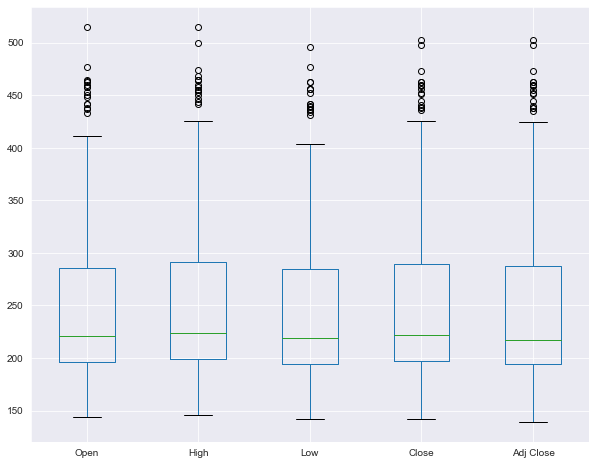

In [18]:
apple[['Open','High','Low','Close','Adj Close']].plot(kind = 'box',figsize = (10,8))
plt.show()

In [19]:
df = [{'x' : apple['Date'], 'y' : apple['Adj Close']}]
fig0 = go.Figure(data = df, layout = go.Layout(title = "Apple's Stock Prices", xaxis = dict(title = 'Date'), yaxis = dict(title = 'Price')))
iplot(fig0)

#### Plotting Daily returns as a function of Percent change in Adjusted Close value


In [20]:
apple['Daily Return'] = apple['Adj Close'].pct_change()

In [21]:
data = [{'x' : apple['Date'], 'y' : apple['Daily Return']}]
fig1 = go.Figure(data = data, layout = go.Layout(title = "Daily Returns of Adjusted Close value", xaxis = dict(title = 'Date'), yaxis = dict(title = 'Daily Returns')))
iplot(fig1)

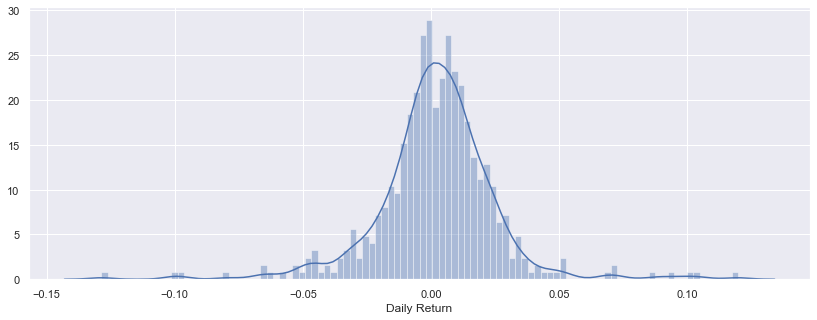

In [22]:
# Plotting the average daily returns of the stock
sns.set(rc={'figure.figsize':(14,5)})
sns.distplot(apple['Daily Return'].dropna(),bins=100)
plt.show()

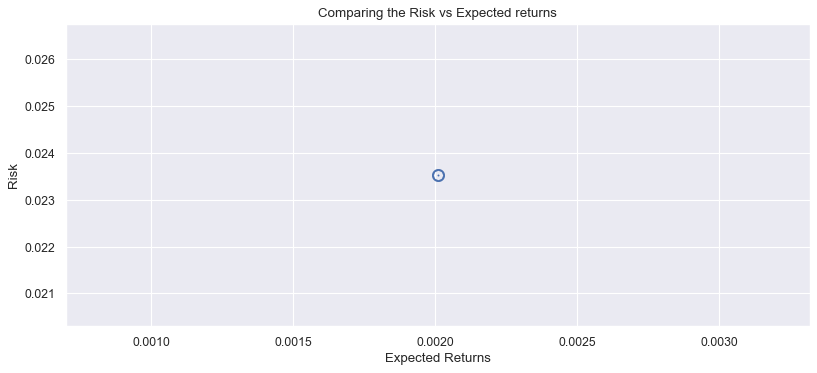

In [24]:
# Risk Analysis: Comparing the Risk vs Expected returns

returns = apple['Daily Return'].dropna()

area = np.pi*1
plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(returns.mean(),returns.std(),s=area,linewidth=10)
plt.title('Comparing the Risk vs Expected returns')
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
plt.show()

In [26]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

apple['Daily Return'].quantile(0.05)

-0.03380037557855388

In [27]:
days = 730

dx = 1/days

mu = returns.mean()

sigma = returns.std()

In [28]:
# Defining the Monte Carlo Simulation Function

def monte_carlo_sim(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dx,scale=sigma*np.sqrt(dx))
        
        drift[x] = mu * dx
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [29]:
apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Daily Return
0,2018-08-24,216.899994,215.110001,216.600006,216.160004,18476400.0,210.765762,NaN
1,2018-08-27,218.740005,216.330002,217.149994,217.940002,20525100.0,212.501312,0.008234
2,2018-08-28,220.539993,218.919998,219.009995,219.699997,22776800.0,214.217407,0.008076
3,2018-08-29,223.490005,219.410004,220.149994,222.979996,27254800.0,217.415573,0.014930
4,2018-08-30,228.259995,222.399994,223.250000,225.029999,48793800.0,219.414398,0.009194


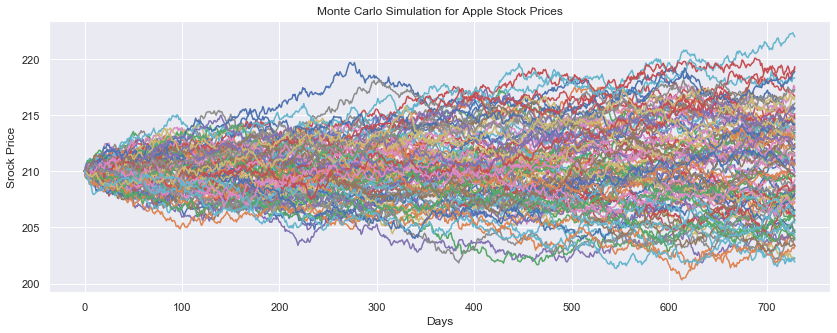

In [30]:
# Running the Monte Carlo simulation a hundred times

start_price = 210.012569

for run in range(100):
    plt.plot(monte_carlo_sim(start_price,days,mu,sigma))


plt.title('Monte Carlo Simulation for Apple Stock Prices')
plt.xlabel('Days')
plt.ylabel('Srock Price')
plt.show()

In [31]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monte_carlo_sim(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

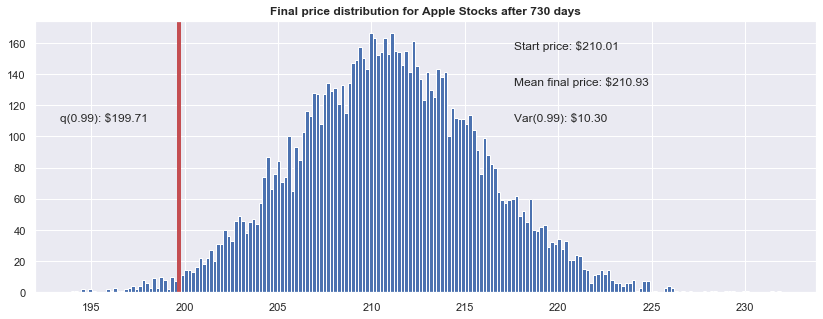

In [32]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "Var(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Apple Stocks after %s days" % days, weight='bold');

<mark> THANK YOU <mark>